In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, KMeans, AffinityPropagation
%matplotlib inline

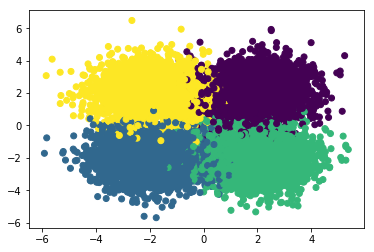

In [23]:
# Four Blobs
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

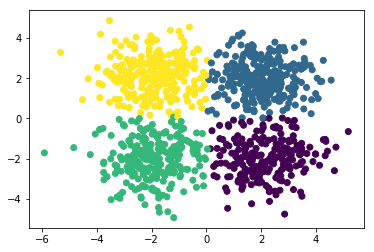

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [25]:
#K-means

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

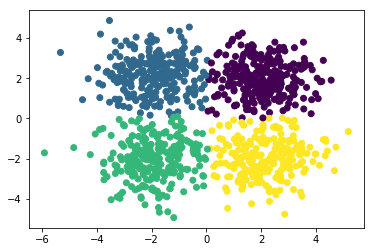

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [26]:
#Mean-shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


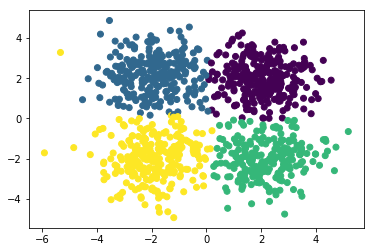

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      262    8    3    0
1        0    5    6  228
2        3    1  223   11
3        2  238    0   10


In [33]:
#Spectral Clustering

n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Done


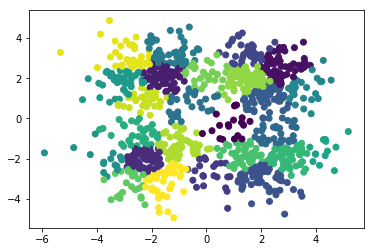

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  \
row_0                                         ...                               
0       7  62   0   0   0  31   0  54   2   2 ...   0   0   0   0  18  68   0   
1       0   0   0  51  14   0   0   0   0   6 ...  32   0   2  25   0   0  49   
2      11   0   0   0   8   0  58   1  29   1 ...   0  57  50   0   0   0   8   
3       1   0  59   0   0   1   0   0   0  16 ...   3   0   0   0   9   0   2   

col_0  22  23  24  
row_0              
0       0   0   0  
1       1   0  44  
2       0   0   1  
3      33  39   0  

[4 rows x 25 columns]


In [31]:
#Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


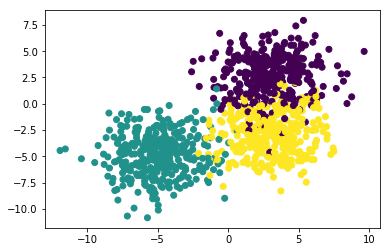

In [3]:
# Less Samples

centers = [[3, 3], [-5, -5], [3, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=1000,
    centers=centers,
    cluster_std=2,
    n_features=4,
    random_state=50)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

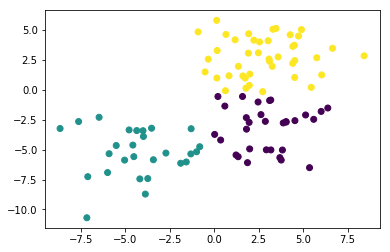

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0       3   1  27
1       0  25   2
2      40   0   2


In [5]:
#K-means

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

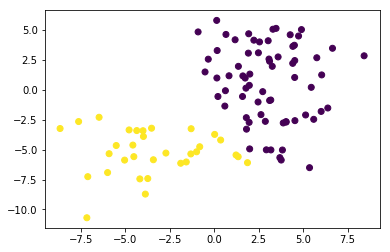

Comparing the assigned categories to the ones in the data:
col_0   0   1
row_0        
0      43   0
1       0  26
2      25   6


In [6]:
#Mean-shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


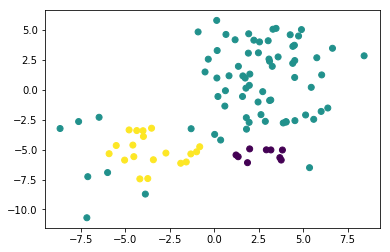

Comparing the assigned categories to the ones in the data:
col_0  0   1   2
row_0           
0      0  43   0
1      0   9  17
2      9  20   2


In [7]:
#Spectral Clustering

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Done


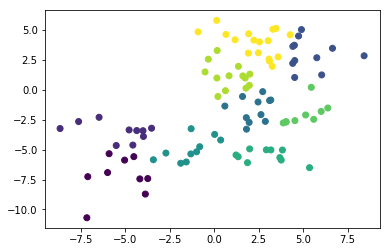

Comparing the assigned categories to the ones in the data:
col_0  0   1   2  3  4   5  6   7   8
row_0                                
0      0   0  11  4  0   0  0  11  17
1      9  10   0  0  7   0  0   0   0
2      0   0   0  7  3  10  9   2   0


In [8]:
#Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

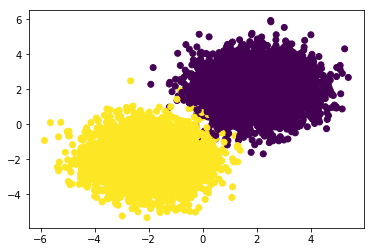

In [9]:
# Two Blobs 

centers = [[2, 2], [-2, -2]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

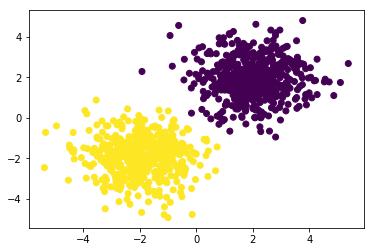

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485


In [10]:
#K-means

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

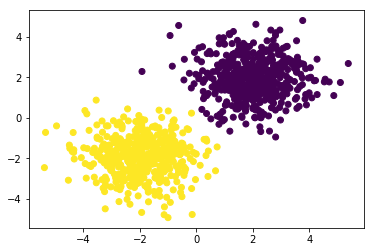

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


In [11]:
#Mean-shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

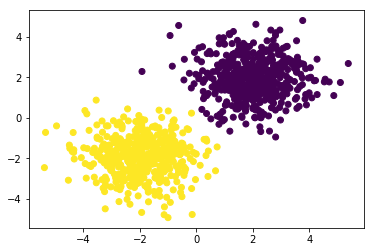

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


In [12]:
#Spectral Clustering

n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Done


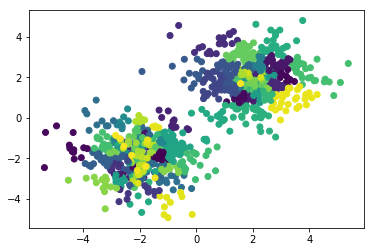

Comparing the assigned categories to the ones in the data:
col_0  0    1    2    3    4    5    6    7    8    9   ...   212  213  214  \
row_0                                                   ...                   
0        0    0    0    0   14    0   12    0    0    0 ...     0    0   33   
1       16    1    1    1    0   13    0    2    1    1 ...     4    1    0   

col_0  215  216  217  218  219  220  221  
row_0                                     
0        0    0    0    0    0    0    1  
1        1    1    1    2    1    1    0  

[2 rows x 222 columns]


In [13]:
#Affinity Propagation

af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

According to the performance of each blob, kmeans and mean-shift both had accurate predictions no matter the number or distance of the blobs. Affinity propogation creates many different blobs and creates more as we decrease the number. Spectral clustering has more errors than kmeans and mean shift but does perform better than affinity. Overall, kmeans and mean-shift seem to be the best for this data.